# 통계적 방법에 따른 변수 선택 및 분류

- 결측치 제거 및 통계적 방법으로 선정된 컬럼을 가진 데이터를 활용
- random forest, logistic , svm classifier를 통해 분류

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import sys

In [3]:
#시각화 패키지들
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from statsmodels.graphics.mosaicplot import mosaic
plt.style.use("ggplot")


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


from sklearn.ensemble import GradientBoostingClassifier


import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# VotingClassifier
from sklearn.ensemble import VotingClassifier



In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score


In [6]:

import optuna
from optuna import Trial
from optuna.samplers import TPESampler


# 통계적 방법에 따른 변수 로드

In [7]:
#기초 전처리 데이터 출력
x_train = pd.read_excel("../data/cip_clean.xlsx")
x_test = pd.read_excel("../data/cip_clean_test.xlsx")

y_train = pd.read_excel("../data/cip_clean_y.xlsx")
y_test = pd.read_excel("../data/cip_clean_test_y.xlsx")

In [8]:
x_train.drop(['factor1','factor2','factor3'],axis=1,inplace=True)
x_test.drop(['factor1','factor2','factor3'],axis=1,inplace=True)

In [9]:
x_train[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']] = x_train[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']].astype('category') 

In [10]:
x_test[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']] =x_test[['sex','bed','Foley','Nursing','Hsp-acq','3m-Ab','3m-Adm','NR','1y-UTI','PPIantacid',
   'CV']].astype('category') 

In [11]:
x_train.columns

Index(['iDBP', 'iBT', 'pCO2', 'SaO2', 'Hb', 'Plt', 'sex', 'bed', 'Foley',
       'Nursing', 'Hsp-acq', '3m-Ab', '3m-Adm', 'NR', '1y-UTI', 'PPIantacid',
       'CV'],
      dtype='object')

In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   iDBP        374 non-null    int64   
 1   iBT         374 non-null    float64 
 2   pCO2        374 non-null    float64 
 3   SaO2        374 non-null    float64 
 4   Hb          374 non-null    float64 
 5   Plt         374 non-null    int64   
 6   sex         374 non-null    category
 7   bed         374 non-null    category
 8   Foley       374 non-null    category
 9   Nursing     374 non-null    category
 10  Hsp-acq     374 non-null    category
 11  3m-Ab       374 non-null    category
 12  3m-Adm      374 non-null    category
 13  NR          374 non-null    category
 14  1y-UTI      374 non-null    category
 15  PPIantacid  374 non-null    category
 16  CV          374 non-null    category
dtypes: category(11), float64(4), int64(2)
memory usage: 23.0 KB


In [13]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   iDBP        94 non-null     int64   
 1   iBT         94 non-null     float64 
 2   pCO2        94 non-null     float64 
 3   SaO2        94 non-null     float64 
 4   Hb          94 non-null     float64 
 5   Plt         94 non-null     int64   
 6   sex         94 non-null     category
 7   bed         94 non-null     category
 8   Foley       94 non-null     category
 9   Nursing     94 non-null     category
 10  Hsp-acq     94 non-null     category
 11  3m-Ab       94 non-null     category
 12  3m-Adm      94 non-null     category
 13  NR          94 non-null     category
 14  1y-UTI      94 non-null     category
 15  PPIantacid  94 non-null     category
 16  CV          94 non-null     category
dtypes: category(11), float64(4), int64(2)
memory usage: 6.9 KB


# 분류

## Logistic regression

In [14]:
import statsmodels.api as sm

numeric_cols=[]
for idx,col in enumerate(x_train.columns):
    col_type = x_train[col].dtype
    if col_type.name !='category':
        numeric_cols.append(col)

In [15]:
#표준화


scaler = StandardScaler()

x_train_stat_logistic = x_train.copy()
x_test_stat_logistic = x_test.copy()


x_train_stat_logistic[numeric_cols] = scaler.fit_transform(x_train_stat_logistic[numeric_cols])
x_test_stat_logistic[numeric_cols] = scaler.transform(x_test_stat_logistic[numeric_cols])




In [16]:
col_all = ['bed','Hsp-acq','3m-Ab','3m-Adm','1y-UTI','Hb',
           'Foley','NR','iBT','sex','SaO2','Nursing','iDBP','pCO2',
           'Plt','CV','PPIantacid']
col5 = col_all[:5]
col10 = col_all[:10]
col15 = col_all[:15]

In [17]:
x_train_stat5_logistic = x_train_stat_logistic.copy()
x_train_stat5_logistic = x_train_stat_logistic[col5]

x_test_stat5_logistic = x_test_stat_logistic.copy()
x_test_stat5_logistic = x_test_stat_logistic[col5]


x_train_stat10_logistic = x_train_stat_logistic.copy()
x_train_stat10_logistic = x_train_stat_logistic[col10]

x_test_stat10_logistic = x_test_stat_logistic.copy()
x_test_stat10_logistic = x_test_stat_logistic[col10]


x_train_stat15_logistic = x_train_stat_logistic.copy()
x_train_stat15_logistic = x_train_stat_logistic[col15]

x_test_stat15_logistic = x_test_stat_logistic.copy()
x_test_stat15_logistic = x_test_stat_logistic[col15]


### reduced (17)

In [22]:
test_logistic = pd.DataFrame(columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1'])
test_logistic

,name,AUC,ACC,RECALL,SPECIFICITY,F1


In [23]:
names=[]
aucs=[]
accs=[]
recalls_list=[]
specificitys=[]
f1s=[]

In [18]:


logit_mod = sm.Logit(y_train['CIP'], x_train_stat_logistic)
results = logit_mod.fit()

#model_logistic = LogisticRegression( )
#model_logistic.fit( x_train_base_logistic, y_train['CIP'] )
#model_logistic.predict( x_test_base_logistic )

predicted = results.predict(x_test_stat_logistic)
predicted1 = predicted 
print(predicted)
predicted = (predicted>0.5).astype(int)


print('Baseline accuracy : ' ,accuracy_score(y_pred = predicted, y_true = y_test['CIP']))
print('Baseline recall : ' ,recall_score(y_pred = predicted, y_true = y_test['CIP'],average=None)[1] )


Optimization terminated successfully.
         Current function value: 0.597524
         Iterations 8
0     0.442883
1     0.477561
2     0.429049
3     0.554577
4     0.456329
        ...   
89    0.297300
90    0.781534
91    0.816833
92    0.403711
93    0.357622
Length: 94, dtype: float64
Baseline accuracy :  0.6063829787234043
Baseline recall :  0.7446808510638298


In [19]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                    CIP   No. Observations:                  374
Model:                          Logit   Df Residuals:                      357
Method:                           MLE   Df Model:                           16
Date:                Fri, 26 Aug 2022   Pseudo R-squ.:                  0.1379
Time:                        15:49:27   Log-Likelihood:                -223.47
converged:                       True   LL-Null:                       -259.23
Covariance Type:            nonrobust   LLR p-value:                 5.408e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
iDBP          -0.1027      0.123     -0.836      0.403      -0.344       0.138
iBT           -0.1356      0.275     -0.493      0.622      -0.674       0.403
pCO2           0.1156      0.121      0.956      0.3

In [20]:
print(classification_report(y_true=y_test['CIP'],y_pred=predicted) )

              precision    recall  f1-score   support

           0       0.65      0.47      0.54        47
           1       0.58      0.74      0.65        47

    accuracy                           0.61        94
   macro avg       0.62      0.61      0.60        94
weighted avg       0.62      0.61      0.60        94



In [21]:
results.pvalues[results.pvalues<0.05]

Hsp-acq    0.002054
NR         0.018909
1y-UTI     0.019396
dtype: float64

In [22]:
np.exp(results.params)

iDBP          0.902361
iBT           0.873226
pCO2          1.122513
SaO2          0.205043
Hb            0.384057
Plt           1.109126
sex           0.817348
bed           1.742164
Foley         0.931423
Nursing       1.387405
Hsp-acq       3.855968
3m-Ab         1.554247
3m-Adm        0.890774
NR            0.508904
1y-UTI        2.048734
PPIantacid    0.673485
CV            0.918232
dtype: float64

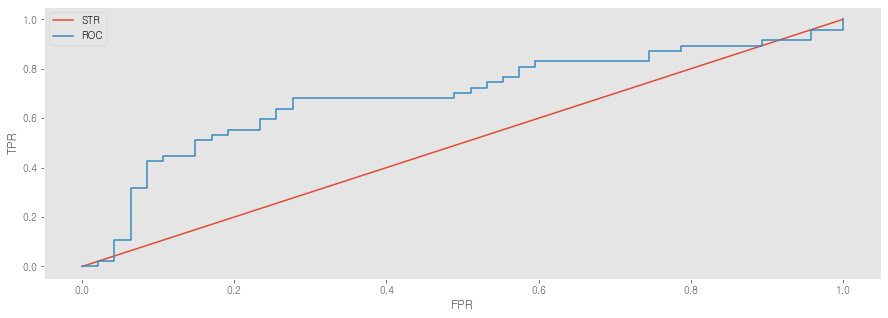

In [23]:
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=results.predict(x_test_stat_logistic)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()


In [24]:
    #baseline - rf tree / auc score
from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))

roc auc value 0.6889995473064736


In [25]:
auc=roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('logistic_17')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [26]:
test_logistic= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_logistic.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']

In [27]:
test_logistic

,name,AUC,ACC,RECALL,SPECIFICITY,F1
0,logistic_17,0.689,0.606383,0.744681,0.468085,0.654206


### 10 변수

In [18]:


logit_mod = sm.Logit(y_train['CIP'], x_train_stat10_logistic)
results = logit_mod.fit()

predicted = results.predict(x_test_stat10_logistic)
predicted1 = predicted 
print(predicted)
predicted = (predicted>0.5).astype(int)


print('Baseline accuracy : ' ,accuracy_score(y_pred = predicted, y_true = y_test['CIP']))
print('Baseline recall : ' ,recall_score(y_pred = predicted, y_true = y_test['CIP'],average=None)[1] )


Optimization terminated successfully.
         Current function value: 0.610995
         Iterations 7
0     0.424077
1     0.475484
2     0.419106
3     0.493712
4     0.458999
        ...   
89    0.394280
90    0.747522
91    0.804411
92    0.395505
93    0.511658
Length: 94, dtype: float64
Baseline accuracy :  0.6063829787234043
Baseline recall :  0.7021276595744681


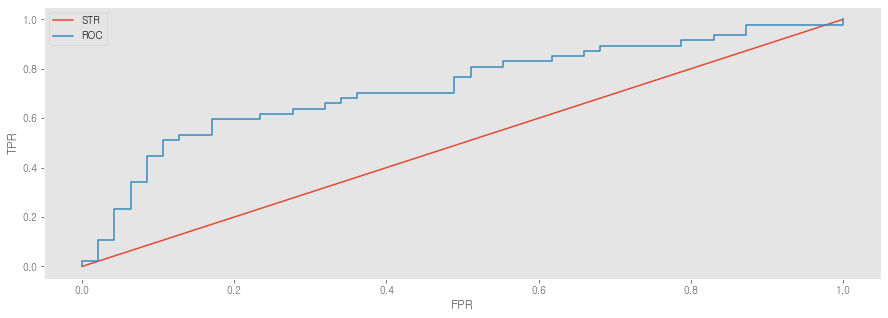

In [19]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=results.predict(x_test_stat10_logistic)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [29]:
results.predict(x_test_stat10_logistic)

0     0.424077
1     0.475484
2     0.419106
3     0.493712
4     0.458999
        ...   
89    0.394280
90    0.747522
91    0.804411
92    0.395505
93    0.511658
Length: 94, dtype: float64

In [20]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.7247623358985966


In [24]:
auc=roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('logistic_10')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [25]:
test_logistic= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_logistic.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']

In [26]:
test_logistic

,name,AUC,ACC,RECALL,SPECIFICITY,F1
0,logistic_10,0.724762,0.606383,0.702128,0.510638,0.640777


#### recall threshold change

In [27]:
def plot_pr_curve(test_y, model_probs,clf_name):
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(test_y[test_y==1]) / len(test_y)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # plot model precision-recall curve
    precision, recall, _ = precision_recall_curve(test_y, model_probs)
    plt.plot(recall, precision, marker='.', label=clf_name)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

70
Best Threshold=0.469170, F-Score=0.710


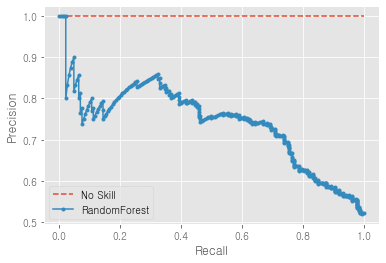

In [31]:

# optimal threshold for precision-recall curve with logistic regression model

from numpy import argmax
from sklearn.metrics import precision_recall_curve
# predict probabilities
yhat = results.predict(x_train_stat10_logistic)

precision, recall, thresholds = precision_recall_curve(y_train, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
print(np.where(recall > 0.90)[0][-1])
ix = np.where(recall > 0.90)[0][-1]
#ix = argmax(np.nan_to_num(recall))
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
plot_pr_curve(y_train, yhat,'RandomForest')


In [32]:

# optimal threshold for precision-recall curve with logistic regression model
from sklearn.metrics import precision_recall_curve
# predict probabilities
yhat = results.predict(x_test_stat10_logistic)
# keep probabilities for the positive outcome only
yhat[yhat>0.469170]=1
yhat[yhat !=1] = 0


In [33]:

accuracy = [accuracy_score(y_true=y_test,y_pred=yhat),]
recall = [recall_score(y_true=y_test, y_pred=yhat, pos_label=1),]
precision = [precision_score(y_true=y_test, y_pred=yhat),]
specificity = [recall_score(y_true=y_test, y_pred=yhat, pos_label=0),]
f1 = [f1_score(y_true=y_test, y_pred=yhat),]
pd.DataFrame([accuracy,recall,precision,specificity,f1])
#print(accuracy, recall,precision,specificity, f1 )

,0
0,0.606383
1,0.872340
2,0.569444
3,0.340426
4,0.689076


### 15 변수

In [34]:


logit_mod = sm.Logit(y_train['CIP'], x_train_stat15_logistic)
results = logit_mod.fit()

predicted = results.predict(x_test_stat15_logistic)
predicted1 = predicted 
print(predicted)
predicted = (predicted>0.5).astype(int)


print('Baseline accuracy : ' ,accuracy_score(y_pred = predicted, y_true = y_test['CIP']))
print('Baseline recall : ' ,recall_score(y_pred = predicted, y_true = y_test['CIP'],average=None)[1] )


Optimization terminated successfully.
         Current function value: 0.602200
         Iterations 8
0     0.434443
1     0.536482
2     0.446296
3     0.545979
4     0.443138
        ...   
89    0.309651
90    0.759265
91    0.789437
92    0.392944
93    0.303517
Length: 94, dtype: float64
Baseline accuracy :  0.6382978723404256
Baseline recall :  0.8297872340425532


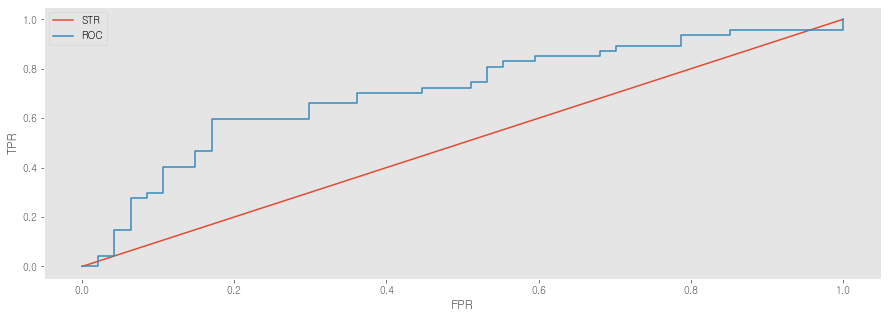

In [35]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=results.predict(x_test_stat15_logistic)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [36]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.7052965142598461


In [37]:
auc=roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('logistic_15')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [38]:
test_logistic= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_logistic.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']

In [39]:
test_logistic

,name,AUC,ACC,RECALL,SPECIFICITY,F1
0,logistic_17,0.689000,0.606383,0.744681,0.468085,0.654206
1,logistic_10,0.724762,0.606383,0.702128,0.510638,0.640777
2,logistic_15,0.705297,0.638298,0.829787,0.446809,0.696429


In [40]:
test_logistic.sort_values('name')

,name,AUC,ACC,RECALL,SPECIFICITY,F1
1,logistic_10,0.724762,0.606383,0.702128,0.510638,0.640777
2,logistic_15,0.705297,0.638298,0.829787,0.446809,0.696429
0,logistic_17,0.689000,0.606383,0.744681,0.468085,0.654206


## SVM

In [41]:
test_svm = pd.DataFrame(columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1'])
test_svm

,name,AUC,ACC,RECALL,SPECIFICITY,F1


In [42]:
names=[]
aucs=[]
accs=[]
recalls_list=[]
specificitys=[]
f1s=[]

In [43]:
#표준화


scaler = StandardScaler()

x_train_stat_svm = x_train.copy()
x_test_stat_svm = x_test.copy()


x_train_stat_svm[numeric_cols] = scaler.fit_transform(x_train_stat_svm[numeric_cols])
x_test_stat_svm[numeric_cols] = scaler.transform(x_test_stat_svm[numeric_cols])




In [44]:
x_train_stat5_svm = x_train_stat_svm.copy()
x_train_stat5_svm = x_test_stat_svm[col5]

x_test_stat5_svm = x_test_stat_svm.copy()
x_test_stat5_svm = x_test_stat_svm[col5]


x_train_stat10_svm = x_train_stat_svm.copy()
x_train_stat10_svm = x_train_stat_svm[col10]

x_test_stat10_svm = x_test_stat_svm.copy()
x_test_stat10_svm = x_test_stat_svm[col10]


x_train_stat15_svm = x_train_stat_svm.copy()
x_train_stat15_svm = x_train_stat_svm[col15]

x_test_stat15_svm = x_test_stat_svm.copy()
x_test_stat15_svm = x_test_stat_svm[col15]


### reduced (17)

In [45]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'linear',random_state=1234)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,param_grid = parameters, cv = 5)

grid_svm.fit(x_train_stat_svm, y_train['CIP'])

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)


,C,mean_test_score
2,0.100,0.716216
4,10.000,0.708324
5,25.000,0.708288
1,0.010,0.702991
6,50.000,0.702955
7,100.000,0.702955
3,1.000,0.697550
0,0.001,0.502667


In [46]:

print('best params : ' ,grid_svm.best_params_)
model_best_svm = grid_svm.best_estimator_

best params :  {'C': 0.1}


In [47]:
model_best_svm = svm.SVC(C=0.1,kernel = 'linear',random_state=1234,probability=True)
model_best_svm.fit(x_train_stat_svm, y_train['CIP'])

SVC(C=0.1, kernel='linear', probability=True, random_state=1234)

In [48]:
from sklearn.metrics import accuracy_score

predicted = model_best_svm.predict(x_test_stat_svm)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')

accuracy score: 0.702
recall score: 0.596


In [49]:
y_test

,CIP
0,0
1,1
2,1
3,0
4,0
...,...
89,0
90,0
91,1
92,0


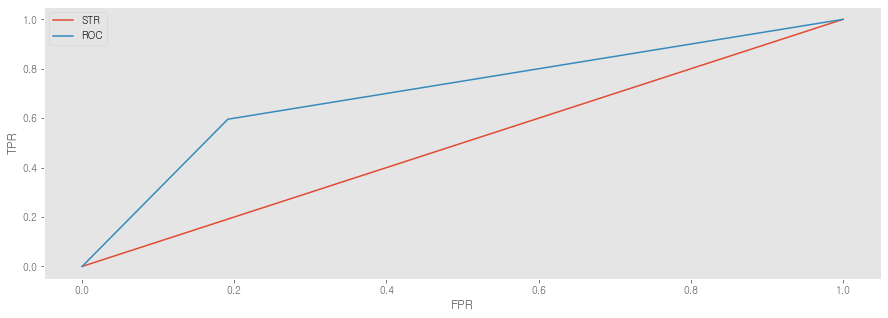

In [50]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best_svm.predict(x_test_stat_svm)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [51]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.7021276595744681


In [52]:
auc=roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('svm_17')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [53]:
test_svm= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_svm.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']

In [54]:
test_svm

,name,AUC,ACC,RECALL,SPECIFICITY,F1
0,svm_17,0.702128,0.702128,0.595745,0.808511,0.666667


### 10 변수

In [55]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'linear',random_state=1234)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,param_grid = parameters, cv = 5)

grid_svm.fit(x_train_stat10_svm, y_train['CIP'])

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)


,C,mean_test_score
5,25.000,0.721838
2,0.100,0.716252
6,50.000,0.708324
7,100.000,0.708324
3,1.000,0.700324
4,10.000,0.700252
1,0.010,0.686919
0,0.001,0.502667


In [56]:

print('best params : ' ,grid_svm.best_params_)
model_best_svm = grid_svm.best_estimator_

best params :  {'C': 25}


In [57]:
model_best_svm = svm.SVC(C=25,kernel = 'linear',random_state=1234,probability=True)
model_best_svm.fit(x_train_stat10_svm, y_train['CIP'])

SVC(C=25, kernel='linear', probability=True, random_state=1234)

In [58]:
from sklearn.metrics import accuracy_score

predicted = model_best_svm.predict(x_test_stat10_svm)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')

accuracy score: 0.745
recall score: 0.617


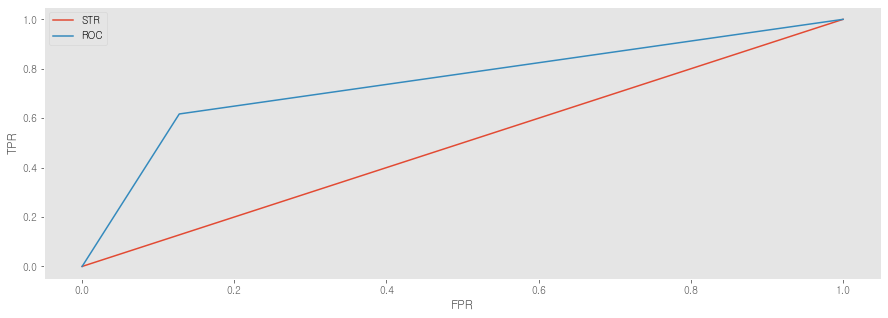

In [59]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best_svm.predict(x_test_stat10_svm)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [60]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.7446808510638299


In [61]:
auc=roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('svm_10')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [62]:
test_svm= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_svm.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']

In [63]:
test_svm

,name,AUC,ACC,RECALL,SPECIFICITY,F1
0,svm_17,0.702128,0.702128,0.595745,0.808511,0.666667
1,svm_10,0.744681,0.744681,0.617021,0.872340,0.707317


### 15 변수

In [64]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'linear',random_state=1234)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,param_grid = parameters, cv = 5)

grid_svm.fit(x_train_stat15_svm, y_train['CIP'])

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)


,C,mean_test_score
2,0.100,0.721550
4,10.000,0.705658
5,25.000,0.705658
6,50.000,0.705622
7,100.000,0.705622
3,1.000,0.700252
1,0.010,0.684288
0,0.001,0.502667


In [65]:

print('best params : ' ,grid_svm.best_params_)
model_best_svm = grid_svm.best_estimator_

best params :  {'C': 0.1}


In [66]:
model_best_svm = svm.SVC(C=0.1,kernel = 'linear',random_state=1234,probability=True)
model_best_svm.fit(x_train_stat15_svm, y_train['CIP'])

SVC(C=0.1, kernel='linear', probability=True, random_state=1234)

In [67]:
from sklearn.metrics import accuracy_score

predicted = model_best_svm.predict(x_test_stat15_svm)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')

accuracy score: 0.702
recall score: 0.596


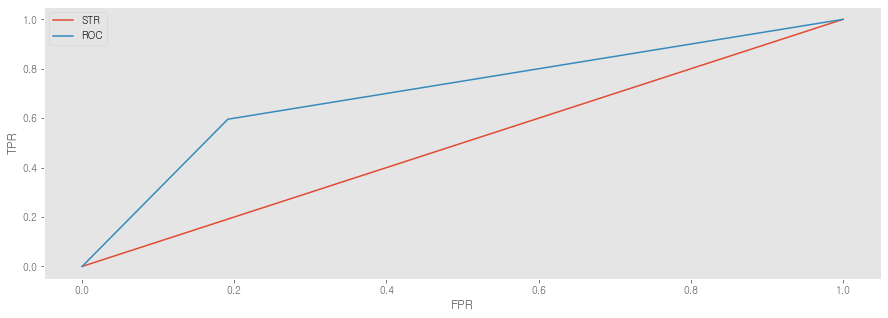

In [68]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best_svm.predict(x_test_stat15_svm)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [69]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.7021276595744681


In [70]:
auc=roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('svm_15')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [71]:
test_svm= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_svm.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']

In [73]:
test_svm.sort_values('name')

,name,AUC,ACC,RECALL,SPECIFICITY,F1
1,svm_10,0.744681,0.744681,0.617021,0.872340,0.707317
2,svm_15,0.702128,0.702128,0.595745,0.808511,0.666667
0,svm_17,0.702128,0.702128,0.595745,0.808511,0.666667


## random forest

In [74]:
test_rf = pd.DataFrame(columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1'])
test_rf

,name,AUC,ACC,RECALL,SPECIFICITY,F1


In [75]:
names=[]
aucs=[]
accs=[]
recalls_list=[]
specificitys=[]
f1s=[]

In [76]:
x_train_stat10_rf = x_train.copy()
x_train_stat10_rf = x_train_stat10_rf[col10]

x_test_stat10_rf = x_test.copy()
x_test_stat10_rf = x_test_stat10_rf[col10]


x_train_stat15_rf = x_train.copy()
x_train_stat15_rf = x_train_stat15_rf[col15]

x_test_stat15_rf = x_test.copy()
x_test_stat15_rf = x_test_stat15_rf[col15]


### reduced (17)

In [77]:

param_list = {"n_estimators": list(range(10, 500, 10)),
              "max_depth": [1,2,3,4,5],}

rf = RandomForestClassifier(random_state=1234)

rf_random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions = param_list,
        n_iter = 50,
        cv = 5,
        scoring = 'accuracy')

rf_random_search.fit(x_train, y_train['CIP'])


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
                   n_iter=50,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   scoring='accuracy')

In [78]:
print('best params : ' ,rf_random_search.best_params_)
model_best=rf_random_search.best_estimator_

best params :  {'n_estimators': 100, 'max_depth': 3}


In [79]:
model_best = RandomForestClassifier(n_estimators=100, max_depth=3,random_state=1234)
model_best.fit(x_train, y_train['CIP'])

RandomForestClassifier(max_depth=3, n_estimators=180, random_state=1234)

In [80]:
from sklearn.metrics import accuracy_score

predicted = model_best.predict(x_test)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')


accuracy score: 0.681
recall score: 0.617


<AxesSubplot:>

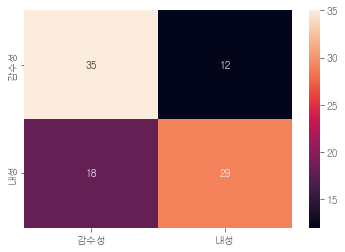

In [81]:

cm = pd.DataFrame(confusion_matrix(y_true=y_test,y_pred = predicted), columns=['감수성','내성'], index=['감수성','내성'])
sns.heatmap(cm, annot=True)

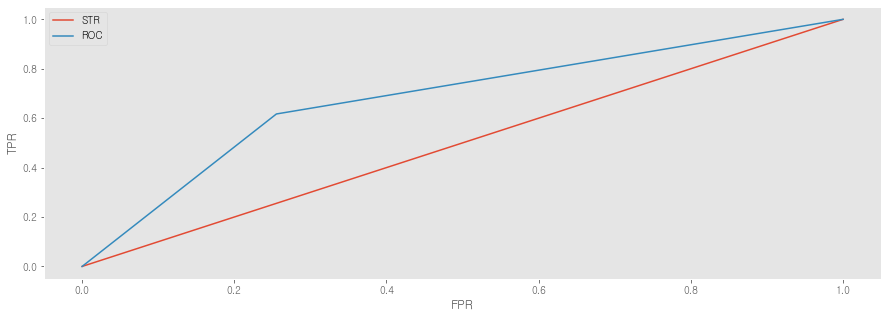

In [82]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best.predict(x_test)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [83]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.6808510638297873


In [84]:
auc=roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('rf_17')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [85]:
test_rf= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_rf.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']

결과적으로, 

모든 변수를 포함한 BASELINE이 0.69 었는데, 통계적 방법에 따른 선택시 0.68이 되었다.

17개의 변수를 사용했을때, shap을 이용했을 때 보다 accuracy는 떨어진다. 하지만, 더 높은 recall을 달성했다.

### 10 변수

In [86]:

param_list = {"n_estimators": list(range(10, 500, 10)),
              "max_depth": [1,2,3,4,5],}

rf = RandomForestClassifier(random_state=1234)

rf_random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions = param_list,
        n_iter = 50,
        cv = 5,
        scoring = 'accuracy')

rf_random_search.fit(x_train_stat10_rf, y_train['CIP'])


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
                   n_iter=50,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   scoring='accuracy')

In [87]:
print('best params : ' ,rf_random_search.best_params_)
model_best=rf_random_search.best_estimator_

best params :  {'n_estimators': 170, 'max_depth': 1}


In [88]:
model_best = RandomForestClassifier(n_estimators=170, max_depth=1,random_state=1234)
model_best.fit(x_train_stat10_rf, y_train['CIP'])

RandomForestClassifier(max_depth=1, n_estimators=170, random_state=1234)

In [89]:
from sklearn.metrics import accuracy_score

predicted = model_best.predict(x_test_stat10_rf)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')


accuracy score: 0.67
recall score: 0.553


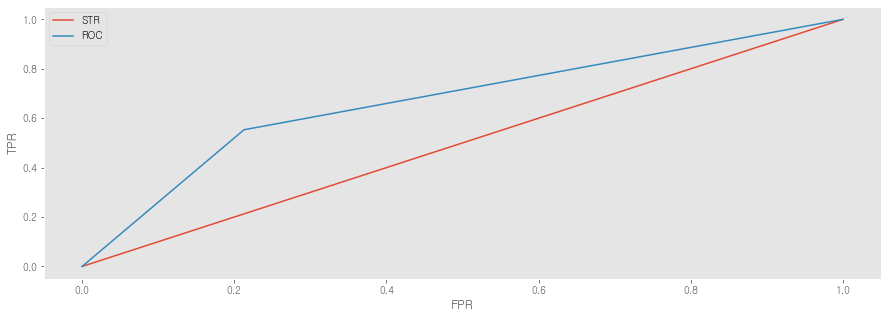

In [90]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best.predict(x_test_stat10_rf)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [91]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.6702127659574468


In [92]:
auc=roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('rf_10')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [93]:
test_rf= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_rf.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']

### 15 변수

In [94]:
param_list = {"n_estimators": list(range(10, 500, 10)),
              "max_depth": [1,2,3,4,5],}

rf = RandomForestClassifier(random_state=1234)

rf_random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions = param_list,
        n_iter = 50,
        cv = 5,
        scoring = 'accuracy')

rf_random_search.fit(x_train_stat15_rf, y_train['CIP'])


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
                   n_iter=50,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   scoring='accuracy')

In [95]:
print('best params : ' ,rf_random_search.best_params_)
model_best=rf_random_search.best_estimator_

best params :  {'n_estimators': 260, 'max_depth': 3}


In [96]:
model_best = RandomForestClassifier(n_estimators=250, max_depth=3,random_state=1234)
model_best.fit(x_train_stat15_rf, y_train['CIP'])

RandomForestClassifier(max_depth=3, n_estimators=250, random_state=1234)

In [97]:
from sklearn.metrics import accuracy_score

predicted = model_best.predict(x_test_stat15_rf)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')


accuracy score: 0.66
recall score: 0.596


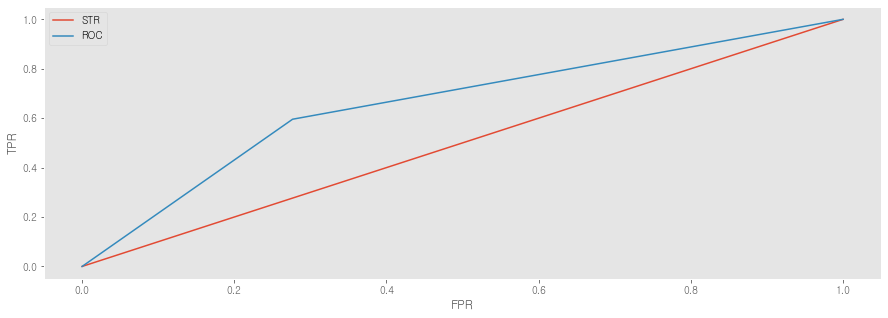

In [98]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best.predict(x_test_stat15_rf)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [99]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



roc auc value 0.6595744680851063


In [100]:
auc=roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('rf_15')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [101]:
test_rf= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_rf.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']

In [103]:
test_rf.sort_values('name')

,name,AUC,ACC,RECALL,SPECIFICITY,F1
1,rf_10,0.670213,0.670213,0.553191,0.787234,0.626506
2,rf_15,0.659574,0.659574,0.595745,0.723404,0.636364
0,rf_17,0.680851,0.680851,0.617021,0.744681,0.659091


In [ ]:
STOP...

## GBM

In [124]:
test_gbm = pd.DataFrame(columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1'])
test_gbm

,name,AUC,ACC,RECALL,SPECIFICITY,F1


In [125]:
names=[]
aucs=[]
accs=[]
recalls_list=[]
specificitys=[]
f1s=[]

In [126]:

x_train_stat_gbm = x_train.copy()
x_test_stat_gbm = x_test.copy()

col_all = ['bed','Hsp-acq','3m-Ab','3m-Adm','1y-UTI','Hb',
           'Foley','NR','iBT','sex','SaO2','Nursing','iDBP','pCO2',
           'Plt','CV','PPIantacid']
col10 = col_all[:10]
col15 = col_all[:15]



In [127]:
x_train_stat17_gbm = x_train_stat_gbm[col_all]
x_test_stat17_gbm = x_test_stat_gbm[col_all]

x_train_stat10_gbm = x_train_stat_gbm[col10]
x_test_stat10_gbm = x_test_stat_gbm[col10]


x_train_stat15_gbm = x_train_stat_gbm[col15]
x_test_stat15_gbm = x_test_stat_gbm[col15]



In [128]:
x_train_stat15_gbm

,bed,Hsp-acq,3m-Ab,3m-Adm,1y-UTI,Hb,Foley,NR,iBT,sex,SaO2,Nursing,iDBP,pCO2,Plt
0,1,0,0,0,1,10.4,1,1,35.3,1,93.8,1,65,36.7,164
1,1,0,0,0,1,7.7,0,1,36.6,1,96.6,1,59,45.0,285
2,0,0,0,0,0,12.2,0,1,39.6,0,96.0,0,95,28.1,254
3,0,0,1,1,0,10.5,0,0,36.9,1,97.3,0,77,29.0,90
4,0,0,0,0,0,11.5,0,0,39.1,0,92.8,0,79,31.3,298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,0,0,0,0,12.9,0,0,39.0,0,96.8,0,69,34.8,238
370,1,1,0,1,0,12.0,0,1,38.6,1,91.7,0,62,30.6,337
371,0,1,1,1,1,9.8,0,0,36.7,1,85.1,0,62,38.6,386
372,1,1,1,1,1,8.0,0,1,37.8,0,99.6,0,62,26.7,533


### reduced(17)

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

# GBM 수행 시간 측정해보기 - 시작하는 시간
start_time = time.time()

gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train_stat17_gbm, y_train['CIP'])
gb_pred = gb_clf.predict(x_test_stat17_gbm)
gb_acc = accuracy_score(y_test, gb_pred)

print(f"기본 모델 정확도 : {gb_acc :.4f}")
print(f"학습 시간 : {time.time()-start_time :.4f}")

## GridSearchCV 이용해서 교차검증&최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': list(range(10, 500, 10)),
    'learning_rate':list(np.arange(0.01, 0.1, 0.01))
}

#param_list = {"n_estimators": list(range(10, 500, 10)),
#              "max_depth": [1,2,3,4,5],}


grid_cv = GridSearchCV(gb_clf, param_grid=params,
                      n_jobs=-1, cv=5, verbose=2)
grid_cv.fit(x_train_stat17_gbm, y_train)
print("최적의 파라미터:", grid_cv.best_params_)
print("최고의 정확도 :", grid_cv.best_score_)

기본 모델 정확도 : 0.6809
학습 시간 : 0.0783
Fitting 5 folds for each of 441 candidates, totalling 2205 fits


KeyboardInterrupt: 

In [130]:
gb_clf = GradientBoostingClassifier(learning_rate = 0.02, n_estimators= 20,random_state=123)
gb_clf.fit(x_train_stat17_gbm, y_train['CIP'])
predicted = gb_clf.predict(x_test_stat17_gbm)
gb_acc = accuracy_score(y_test, predicted)
print(f"최적화 모델 정확도 : {gb_acc :.4f}")

최적화 모델 정확도 : 0.7128


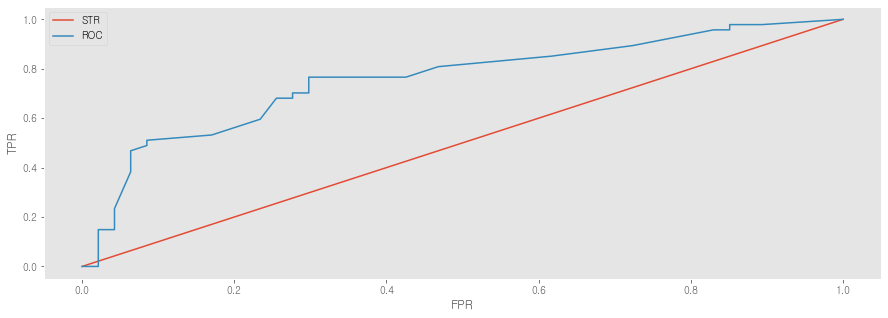

In [131]:
#baseline - rf tree / roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=gb_clf.predict_proba(x_test_stat17_gbm)[:,1]
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()


In [132]:
#baseline - rf tree / auc score
from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))


roc auc value 0.7566772295156179


In [133]:
auc=roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('gbm_17')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


#### recall threshold change

In [45]:
def plot_pr_curve(test_y, model_probs,clf_name):
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(test_y[test_y==1]) / len(test_y)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # plot model precision-recall curve
    precision, recall, _ = precision_recall_curve(test_y, model_probs)
    plt.plot(recall, precision, marker='.', label=clf_name)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

10
Best Threshold=0.432424, F-Score=0.765


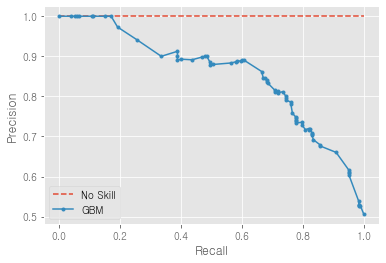

In [58]:

# optimal threshold for precision-recall curve with logistic regression model
from numpy import argmax
from sklearn.metrics import precision_recall_curve
# predict probabilities
yhat = gb_clf.predict_proba(x_train_stat17_gbm)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_train, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
print(np.where(recall > 0.90)[0][-1])
ix = np.where(recall > 0.90)[0][-1]
#ix = argmax(np.nan_to_num(recall))
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
plot_pr_curve(y_train, yhat,'GBM')


In [61]:

# optimal threshold for precision-recall curve with logistic regression model
from numpy import argmax
from sklearn.metrics import precision_recall_curve
# predict probabilities
yhat = gb_clf.predict_proba(x_test_stat17_gbm)
yhat = yhat[:, 1]
# keep probabilities for the positive outcome only
yhat[yhat>0.432424]=1
yhat[yhat !=1] = 0


In [62]:

accuracy = [accuracy_score(y_true=y_test,y_pred=yhat),]
recall = [recall_score(y_true=y_test, y_pred=yhat, pos_label=1),]
precision = [precision_score(y_true=y_test, y_pred=yhat),]
specificity = [recall_score(y_true=y_test, y_pred=yhat, pos_label=0),]
f1 = [f1_score(y_true=y_test, y_pred=yhat),]
pd.DataFrame([accuracy,recall,precision,specificity,f1])
#print(accuracy, recall,precision,specificity, f1 )

,0
0,0.617021
1,0.851064
2,0.579710
3,0.382979
4,0.689655


### 10 변수

In [477]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

# GBM 수행 시간 측정해보기 - 시작하는 시간
start_time = time.time()

gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train_stat10_gbm, y_train['CIP'])
gb_pred = gb_clf.predict(x_test_stat10_gbm)
gb_acc = accuracy_score(y_test, gb_pred)

print(f"기본 모델 정확도 : {gb_acc :.4f}")
print(f"학습 시간 : {time.time()-start_time :.4f}")

## GridSearchCV 이용해서 교차검증&최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': list(range(10, 500, 10)),
    'learning_rate':list(np.arange(0.01, 0.1, 0.01))
}

#param_list = {"n_estimators": list(range(10, 500, 10)),
#              "max_depth": [1,2,3,4,5],}


grid_cv = GridSearchCV(gb_clf, param_grid=params,
                      n_jobs=-1, cv=5, verbose=2)
grid_cv.fit(x_train_stat10_gbm, y_train)
print("최적의 파라미터:", grid_cv.best_params_)
print("최고의 정확도 :", grid_cv.best_score_)

기본 모델 정확도 : 0.6702
학습 시간 : 0.0511
Fitting 5 folds for each of 441 candidates, totalling 2205 fits
최적의 파라미터: {'learning_rate': 0.04, 'n_estimators': 50}
최고의 정확도 : 0.7058018018018017


C:\Users\dlwhd\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [134]:
gb_clf = GradientBoostingClassifier(learning_rate = 0.04, n_estimators= 50,random_state=123)
gb_clf.fit(x_train_stat10_gbm, y_train['CIP'])
predicted = gb_clf.predict(x_test_stat10_gbm)
gb_acc = accuracy_score(y_test, predicted)
print(f"최적화 모델 정확도 : {gb_acc :.4f}")

최적화 모델 정확도 : 0.7021


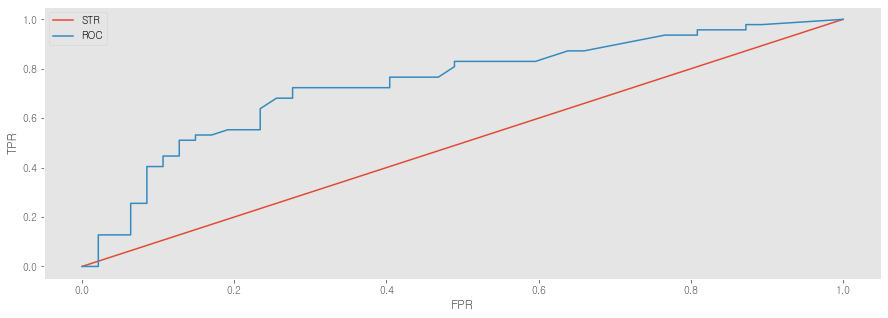

In [135]:
#baseline - rf tree / roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=gb_clf.predict_proba(x_test_stat10_gbm)[:,1]
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()


In [136]:
#baseline - rf tree / auc score
from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))


roc auc value 0.7390221819827977


In [137]:
auc=roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('gbm_10')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


### 15변수

In [482]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

# GBM 수행 시간 측정해보기 - 시작하는 시간
start_time = time.time()

gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train_stat15_gbm, y_train['CIP'])
gb_pred = gb_clf.predict(x_test_stat15_gbm)
gb_acc = accuracy_score(y_test, gb_pred)

print(f"기본 모델 정확도 : {gb_acc :.4f}")
print(f"학습 시간 : {time.time()-start_time :.4f}")

## GridSearchCV 이용해서 교차검증&최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': list(range(10, 500, 10)),
    'learning_rate':list(np.arange(0.01, 0.1, 0.01))
}

#param_list = {"n_estimators": list(range(10, 500, 10)),
#              "max_depth": [1,2,3,4,5],}


grid_cv = GridSearchCV(gb_clf, param_grid=params,
                      n_jobs=-1, cv=5, verbose=2)
grid_cv.fit(x_train_stat15_gbm, y_train)
print("최적의 파라미터:", grid_cv.best_params_)
print("최고의 정확도 :", grid_cv.best_score_)

기본 모델 정확도 : 0.6702
학습 시간 : 0.0781
Fitting 5 folds for each of 441 candidates, totalling 2205 fits
최적의 파라미터: {'learning_rate': 0.08, 'n_estimators': 10}
최고의 정확도 : 0.7057657657657658


C:\Users\dlwhd\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
gb_clf = GradientBoostingClassifier(learning_rate = 0.08, n_estimators= 10,random_state=123)
gb_clf.fit(x_train_stat15_gbm, y_train['CIP'])
predicted = gb_clf.predict(x_test_stat15_gbm)
gb_acc = accuracy_score(y_test, predicted)
print(f"최적화 모델 정확도 : {gb_acc :.4f}")

최적화 모델 정확도 : 0.6809


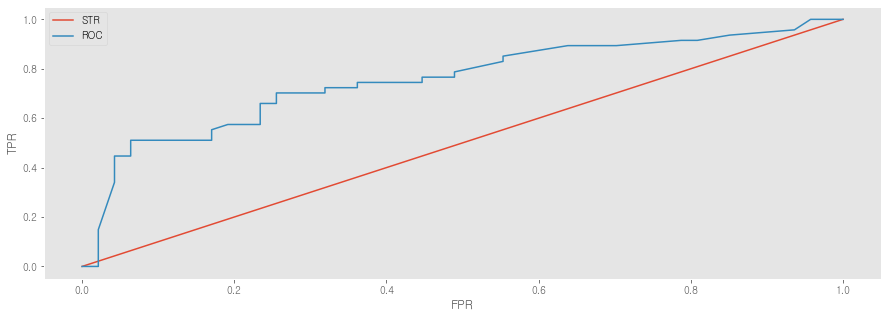

In [139]:
#baseline - rf tree / roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=gb_clf.predict_proba(x_test_stat15_gbm)[:,1]
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()


In [140]:
#baseline - rf tree / auc score
from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))


roc auc value 0.7537347215934812


In [141]:
auc=roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('gbm_15')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [142]:
test_gbm= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_gbm.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']

In [143]:
test_gbm.sort_values('name')

,name,AUC,ACC,RECALL,SPECIFICITY,F1
1,gbm_10,0.739022,0.702128,0.638298,0.765957,0.681818
2,gbm_15,0.753735,0.680851,0.595745,0.765957,0.651163
0,gbm_17,0.756677,0.712766,0.680851,0.744681,0.703297


In [ ]:
STOP...

## MLP

In [70]:
test_mlp = pd.DataFrame(columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1'])
test_mlp

,name,AUC,ACC,RECALL,SPECIFICITY,F1


In [71]:
names=[]
aucs=[]
accs=[]
recalls_list=[]
specificitys=[]
f1s=[]

In [72]:
x_train_stat_mlp = x_train.copy()
x_test_stat_mlp = x_test.copy()

import statsmodels.api as sm

numeric_cols=[]
for idx,col in enumerate(x_train.columns):
    col_type = x_train[col].dtype
    if col_type.name !='category':
        numeric_cols.append(col)

scaler = StandardScaler()

x_train_stat_mlp[numeric_cols] = scaler.fit_transform(x_train_stat_mlp[numeric_cols])
x_test_stat_mlp[numeric_cols] = scaler.transform(x_test_stat_mlp[numeric_cols])




In [73]:
col_all = ['bed','Hsp-acq','3m-Ab','3m-Adm','1y-UTI','Hb',
           'Foley','NR','iBT','sex','SaO2','Nursing','iDBP','pCO2',
           'Plt','CV','PPIantacid']
col10 = col_all[:10]
col15 = col_all[:15]


x_train_stat17_mlp = x_train_stat_mlp[col_all]
x_test_stat17_mlp = x_test_stat_mlp[col_all]

x_train_stat10_mlp = x_train_stat_mlp[col10]
x_test_stat10_mlp = x_test_stat_mlp[col10]


x_train_stat15_mlp = x_train_stat_mlp[col15]
x_test_stat15_mlp = x_test_stat_mlp[col15]



### reduced(17)

In [74]:
# train,valid 나누기
# exp : 학습 중이란 뜻
x_train_stat17_mlp_exp, x_val_stat17_mlp_exp,\
y_train_stat17_mlp_exp, y_val_stat17_mlp_exp = train_test_split(x_train_stat17_mlp,y_train,stratify=y_train,\
                                                  test_size=0.2,random_state=42)  # 훈련 데이터와 검증 데이터 분류
print("train :{} / valid : {} ".format(y_train_stat17_mlp_exp.shape[0],y_val_stat17_mlp_exp.shape[0] ))

train :299 / valid : 75 


In [427]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
def objective(trial):
    n_layers = trial.suggest_int('n_layers', 1, 4,log=False)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 20, 100,log=False))
    clf = MLPClassifier(hidden_layer_sizes=tuple(layers),
                                                activation='relu', \
                                                solver='adam', alpha=0.01, batch_size=32, \
                                                learning_rate_init=0.1, max_iter=500,random_state=42)
    clf.fit(x_train_stat17_mlp_exp, np.ravel(y_train_stat17_mlp_exp))

    return clf.score(x_val_stat17_mlp_exp, np.ravel(y_val_stat17_mlp_exp))

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

In [428]:
print("best params : ",study.best_params)
mlp = MLPClassifier(hidden_layer_sizes = list(study.best_params.values())[1:],
                    activation='relu', \
                    solver='adam', alpha=0.01, batch_size=32, \
                    learning_rate_init=0.1, max_iter=500,random_state=42)  # 객체 생성

mlp.fit(x_train_stat17_mlp_exp, np.ravel(y_train_stat17_mlp_exp))    # 훈련하기

print("훈련 세트 정확도: {:.3f}".format(mlp.score(x_train_stat17_mlp_exp, np.ravel(y_train_stat17_mlp_exp) ) ) )
print("검증 세트 정확도: {:.3f}".format(mlp.score(x_val_stat17_mlp_exp, np.ravel(y_val_stat17_mlp_exp) ) ) )
print("테스트 세트 정확도: {:.3f}".format(mlp.score(x_test_stat17_mlp, np.ravel(y_test) ) ) )
predicted = mlp.predict(x_test_stat17_mlp)

best params :  {'n_layers': 3, 'n_units_0': 22, 'n_units_1': 91, 'n_units_2': 99}
훈련 세트 정확도: 0.833
검증 세트 정확도: 0.787
테스트 세트 정확도: 0.691


In [77]:
## 파라미터 기록해서 사용하는 용도.
stop()
mlp = MLPClassifier(hidden_layer_sizes = [22,91,99],
                    activation='relu', \
                    solver='adam', alpha=0.01, batch_size=32, \
                    learning_rate_init=0.1, max_iter=500,random_state=42)  # 객체 생성

mlp.fit(x_train_stat17_mlp_exp, np.ravel(y_train_stat17_mlp_exp))    # 훈련하기

print("훈련 세트 정확도: {:.3f}".format(mlp.score(x_train_stat17_mlp_exp, np.ravel(y_train_stat17_mlp_exp) ) ) )
print("검증 세트 정확도: {:.3f}".format(mlp.score(x_val_stat17_mlp_exp, np.ravel(y_val_stat17_mlp_exp) ) ) )
print("테스트 세트 정확도: {:.3f}".format(mlp.score(x_test_stat17_mlp, np.ravel(y_test) ) ) )
predicted = mlp.predict(x_test_stat17_mlp)

훈련 세트 정확도: 0.833
검증 세트 정확도: 0.787
테스트 세트 정확도: 0.691


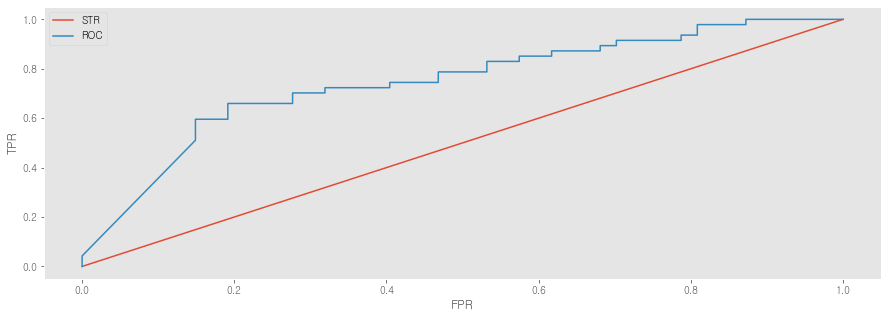

In [429]:
#baseline - rf tree / roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=mlp.predict_proba(x_test_stat17_mlp)[:,1]
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()


In [430]:
auc = roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('mlp_17')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [431]:
test_mlp= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_mlp.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']

In [432]:
test_mlp

,name,AUC,ACC,RECALL,SPECIFICITY,F1
0,mlp_17,0.746039,0.691489,0.659574,0.723404,0.681319


### 10 변수

In [78]:
# train,valid 나누기
# exp : 학습 중이란 뜻
x_train_stat10_mlp_exp, x_val_stat10_mlp_exp,\
y_train_stat10_mlp_exp, y_val_stat10_mlp_exp = train_test_split(x_train_stat10_mlp,y_train,stratify=y_train,\
                                                  test_size=0.2,random_state=42)  # 훈련 데이터와 검증 데이터 분류
print("train :{} / valid : {} ".format(y_train_stat10_mlp_exp.shape[0],y_val_stat10_mlp_exp.shape[0] ))

train :299 / valid : 75 


In [434]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
def objective(trial):
    n_layers = trial.suggest_int('n_layers', 1, 4,log=False)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 20, 100,log=False))
    clf = MLPClassifier(hidden_layer_sizes=tuple(layers),
                                                activation='relu', \
                                                solver='adam', alpha=0.01, batch_size=32, \
                                                learning_rate_init=0.1, max_iter=500,random_state=42)
    clf.fit(x_train_stat10_mlp_exp, np.ravel(y_train_stat10_mlp_exp))

    return clf.score(x_val_stat10_mlp_exp, np.ravel(y_val_stat10_mlp_exp))

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

In [435]:
print("best params : ",study.best_params)
mlp = MLPClassifier(hidden_layer_sizes = list(study.best_params.values())[1:],
                    activation='relu', \
                    solver='adam', alpha=0.01, batch_size=32, \
                    learning_rate_init=0.1, max_iter=500,random_state=42)  # 객체 생성

mlp.fit(x_train_stat10_mlp_exp, np.ravel(y_train_stat10_mlp_exp))    # 훈련하기

print("훈련 세트 정확도: {:.3f}".format(mlp.score(x_train_stat10_mlp_exp, np.ravel(y_train_stat10_mlp_exp) ) ) )
print("검증 세트 정확도: {:.3f}".format(mlp.score(x_val_stat10_mlp_exp, np.ravel(y_val_stat10_mlp_exp) ) ) )
print("테스트 세트 정확도: {:.3f}".format(mlp.score(x_test_stat10_mlp, np.ravel(y_test) ) ) )
predicted = mlp.predict(x_test_stat10_mlp)

best params :  {'n_layers': 3, 'n_units_0': 35, 'n_units_1': 100, 'n_units_2': 57}
훈련 세트 정확도: 0.739
검증 세트 정확도: 0.813
테스트 세트 정확도: 0.670


In [83]:
## 파라미터 기록해서 사용하는 용도.
#stop()
mlp = MLPClassifier(hidden_layer_sizes = [35,100,57],
                    activation='relu', \
                    solver='adam', alpha=0.01, batch_size=32, \
                    learning_rate_init=0.1, max_iter=500,random_state=42)  # 객체 생성

mlp.fit(x_train_stat10_mlp_exp, np.ravel(y_train_stat10_mlp_exp))    # 훈련하기

print("훈련 세트 정확도: {:.3f}".format(mlp.score(x_train_stat10_mlp_exp, np.ravel(y_train_stat10_mlp_exp) ) ) )
print("검증 세트 정확도: {:.3f}".format(mlp.score(x_val_stat10_mlp_exp, np.ravel(y_val_stat10_mlp_exp) ) ) )
print("테스트 세트 정확도: {:.3f}".format(mlp.score(x_test_stat10_mlp, np.ravel(y_test) ) ) )
predicted = mlp.predict(x_test_stat10_mlp)

훈련 세트 정확도: 0.739
검증 세트 정확도: 0.813
테스트 세트 정확도: 0.670


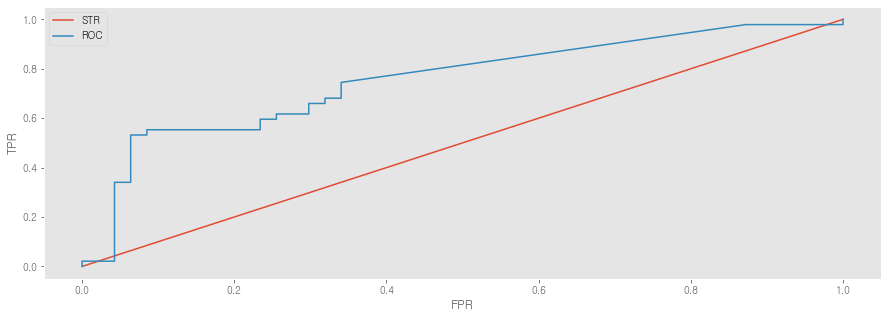

In [84]:
#baseline - rf tree / roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=mlp.predict_proba(x_test_stat10_mlp)[:,1]
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()


In [85]:
auc = roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('mlp_10')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [86]:
test_mlp= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_mlp.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']

In [87]:
test_mlp

,name,AUC,ACC,RECALL,SPECIFICITY,F1
0,mlp_10,0.752603,0.670213,0.617021,0.723404,0.651685


#### recall threshold change

In [111]:
def plot_pr_curve(test_y, model_probs,clf_name):
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(test_y[test_y==1]) / len(test_y)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # plot model precision-recall curve
    precision, recall, _ = precision_recall_curve(test_y, model_probs)
    plt.plot(recall, precision, marker='.', label=clf_name)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

10
Best Threshold=0.206022, F-Score=0.694


C:\Users\dlwhd\miniconda3\envs\localtorch\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


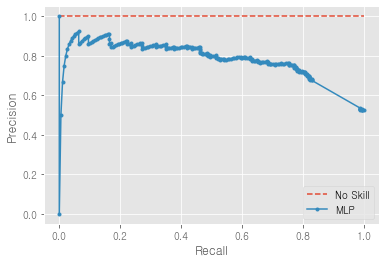

In [120]:

# optimal threshold for precision-recall curve with logistic regression model
from numpy import argmax
from sklearn.metrics import precision_recall_curve
# predict probabilities
yhat = mlp.predict_proba(x_train_stat10_mlp)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_train, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
print(np.where(recall > 0.9)[0][-1])
ix = np.where(recall > 0.9)[0][-1]
#ix = argmax(np.nan_to_num(recall))
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
plot_pr_curve(y_train, yhat,'MLP')


In [122]:

# optimal threshold for precision-recall curve with logistic regression model
from numpy import argmax
from sklearn.metrics import precision_recall_curve
# predict probabilities
yhat = mlp.predict_proba(x_test_stat10_mlp)
yhat = yhat[:, 1]
# keep probabilities for the positive outcome only
yhat[yhat>0.206022]=1
yhat[yhat !=1] = 0


In [123]:

accuracy = [accuracy_score(y_true=y_test,y_pred=yhat),]
recall = [recall_score(y_true=y_test, y_pred=yhat, pos_label=1),]
precision = [precision_score(y_true=y_test, y_pred=yhat),]
specificity = [recall_score(y_true=y_test, y_pred=yhat, pos_label=0),]
f1 = [f1_score(y_true=y_test, y_pred=yhat),]
pd.DataFrame([accuracy,recall,precision,specificity,f1])
#print(accuracy, recall,precision,specificity, f1 )

,0
0,0.702128
1,0.744681
2,0.686275
3,0.659574
4,0.714286


### 15 변수

In [440]:
# train,valid 나누기
# exp : 학습 중이란 뜻
x_train_stat15_mlp_exp, x_val_stat15_mlp_exp,\
y_train_stat15_mlp_exp, y_val_stat15_mlp_exp = train_test_split(x_train_stat15_mlp,y_train,stratify=y_train,\
                                                  test_size=0.2,random_state=42)  # 훈련 데이터와 검증 데이터 분류
print("train :{} / valid : {} ".format(y_train_stat15_mlp_exp.shape[0],y_val_stat15_mlp_exp.shape[0] ))

train :299 / valid : 75 


In [441]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
def objective(trial):
    n_layers = trial.suggest_int('n_layers', 1, 4,log=False)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 20, 100,log=False))
    clf = MLPClassifier(hidden_layer_sizes=tuple(layers),
                                                activation='relu', \
                                                solver='adam', alpha=0.01, batch_size=32, \
                                                learning_rate_init=0.1, max_iter=500,random_state=42)
    clf.fit(x_train_stat15_mlp_exp, np.ravel(y_train_stat15_mlp_exp))

    return clf.score(x_val_stat15_mlp_exp, np.ravel(y_val_stat15_mlp_exp))

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

In [442]:
print("best params : ",study.best_params)
mlp = MLPClassifier(hidden_layer_sizes = list(study.best_params.values())[1:],
                    activation='relu', \
                    solver='adam', alpha=0.01, batch_size=32, \
                    learning_rate_init=0.1, max_iter=500,random_state=42)  # 객체 생성

mlp.fit(x_train_stat15_mlp_exp, np.ravel(y_train_stat15_mlp_exp))    # 훈련하기

print("훈련 세트 정확도: {:.3f}".format(mlp.score(x_train_stat15_mlp_exp, np.ravel(y_train_stat15_mlp_exp) ) ) )
print("검증 세트 정확도: {:.3f}".format(mlp.score(x_val_stat15_mlp_exp, np.ravel(y_val_stat15_mlp_exp) ) ) )
print("테스트 세트 정확도: {:.3f}".format(mlp.score(x_test_stat15_mlp, np.ravel(y_test) ) ) )
predicted = mlp.predict(x_test_stat15_mlp)

best params :  {'n_layers': 3, 'n_units_0': 48, 'n_units_1': 34, 'n_units_2': 51}
훈련 세트 정확도: 0.779
검증 세트 정확도: 0.773
테스트 세트 정확도: 0.713


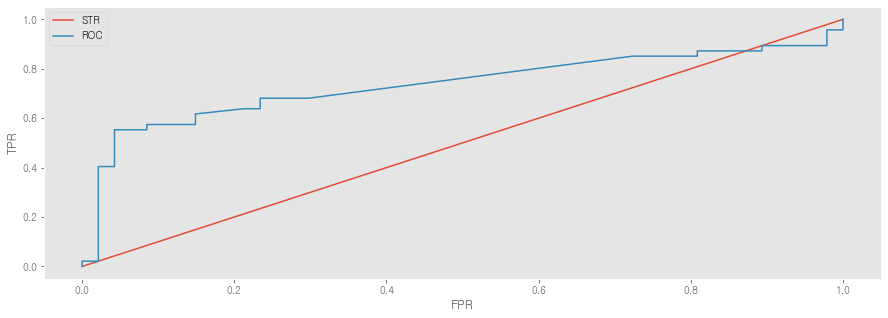

In [443]:
#baseline - rf tree / roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=mlp.predict_proba(x_test_stat15_mlp)[:,1]
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()


In [444]:
auc = roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('mlp_15')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [445]:
test_mlp= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_mlp.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']

In [446]:
test_mlp.sort_values('name')

,name,AUC,ACC,RECALL,SPECIFICITY,F1
1,mlp_10,0.752603,0.670213,0.617021,0.723404,0.651685
2,mlp_15,0.735401,0.712766,0.659574,0.765957,0.696629
0,mlp_17,0.746039,0.691489,0.659574,0.723404,0.681319


## Ensemble

In [449]:
test_ensemble = pd.DataFrame(columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1'])
test_ensemble

,name,AUC,ACC,RECALL,SPECIFICITY,F1


In [450]:
names=[]
aucs=[]
accs=[]
recalls_list=[]
specificitys=[]
f1s=[]

In [451]:
x_train_stat_ensemble = x_train.copy()
x_test_stat_ensemble = x_test.copy()

import statsmodels.api as sm

numeric_cols=[]
for idx,col in enumerate(x_train.columns):
    col_type = x_train[col].dtype
    if col_type.name !='category':
        numeric_cols.append(col)

scaler = StandardScaler()


x_train_stat_ensemble[numeric_cols] = scaler.fit_transform(x_train_stat_ensemble[numeric_cols])
x_test_stat_ensemble[numeric_cols] = scaler.transform(x_test_stat_ensemble[numeric_cols])




In [452]:
col_all = ['bed','Hsp-acq','3m-Ab','3m-Adm','1y-UTI','Hb',
           'Foley','NR','iBT','sex','SaO2','Nursing','iDBP','pCO2',
           'Plt','CV','PPIantacid']
col10 = col_all[:10]
col15 = col_all[:15]


x_train_stat17_ensemble = x_train_stat_ensemble[col_all]
x_test_stat17_ensemble = x_test_stat_ensemble[col_all]

x_train_stat10_ensemble = x_train_stat_ensemble[col10]
x_test_stat10_ensemble = x_test_stat_ensemble[col10]


x_train_stat15_ensemble = x_train_stat_ensemble[col15]
x_test_stat15_ensemble = x_test_stat_ensemble[col15]



### reduced(17)

In [453]:
# ensemble 할 model 정의
models = [
    ('gbc', GradientBoostingClassifier(learning_rate= 0.02,n_estimators=20,random_state=42 ) ),
    ('rfc', RandomForestClassifier(n_estimators=100, max_depth= 3,random_state=42) ),
    ('svc', svm.SVC(C=0.1,probability=True,random_state=42)),
    ('lr', LogisticRegressionCV(random_state=42)),
    ('mlp',MLPClassifier(hidden_layer_sizes=(22,91,99), activation='relu', \
                    solver='adam', alpha=0.01, batch_size=32, \
                    learning_rate_init=0.1, max_iter=500,random_state=42))
]


# soft vote
soft_vote  = VotingClassifier(models, voting='soft')
#soft_vote_cv = cross_validate(soft_vote, x_train_base_ensemble, np.ravel(y_train), cv=5)
soft_vote.fit(x_train_stat17_ensemble, np.ravel(y_train))
print(soft_vote)

VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(learning_rate=0.02,
                                                         n_estimators=20,
                                                         random_state=42)),
                             ('rfc',
                              RandomForestClassifier(max_depth=3,
                                                     random_state=42)),
                             ('svc',
                              SVC(C=0.1, probability=True, random_state=42)),
                             ('lr', LogisticRegressionCV(random_state=42)),
                             ('mlp',
                              MLPClassifier(alpha=0.01, batch_size=32,
                                            hidden_layer_sizes=(22, 91, 99),
                                            learning_rate_init=0.1,
                                            max_iter=500, random_state=42))],
                 voting='soft')


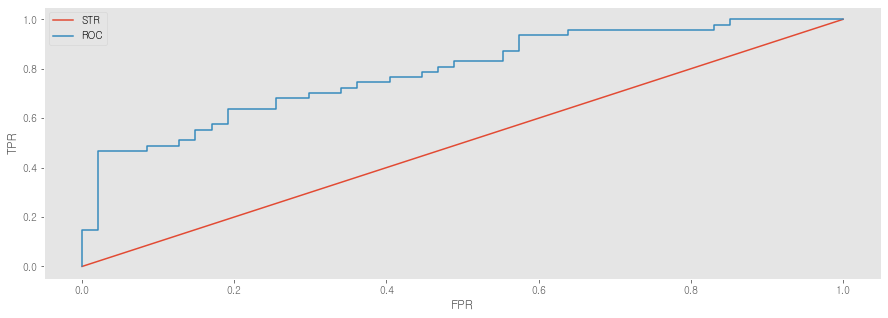

In [454]:
predicted=soft_vote.predict(x_test_stat17_ensemble)

#baseline - rf tree / roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label = soft_vote.predict_proba(x_test_stat17_ensemble)[:,1]
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [455]:
auc = roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('ensemble_17')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [456]:
test_ensemble= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_ensemble.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']
test_ensemble

,name,AUC,ACC,RECALL,SPECIFICITY,F1
0,ensemble_17,0.786329,0.702128,0.638298,0.765957,0.681818


### 10 변수

In [457]:
# ensemble 할 model 정의
models = [
    ('gbc', GradientBoostingClassifier(learning_rate= 0.04,n_estimators=50,random_state=42 ) ),
    ('rfc', RandomForestClassifier(n_estimators=170, max_depth= 1,random_state=42) ),
    ('svc', svm.SVC(C=25,probability=True,random_state=42)),
    ('lr', LogisticRegressionCV(random_state=42)),
    ('mlp',MLPClassifier(hidden_layer_sizes=(35,100,57), activation='relu', \
                    solver='adam', alpha=0.01, batch_size=32, \
                    learning_rate_init=0.1, max_iter=500,random_state=42))
]


# soft vote
soft_vote  = VotingClassifier(models, voting='soft')
#soft_vote_cv = cross_validate(soft_vote, x_train_base_ensemble, np.ravel(y_train), cv=5)
soft_vote.fit(x_train_stat10_ensemble, np.ravel(y_train))
print(soft_vote)

VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(learning_rate=0.04,
                                                         n_estimators=50,
                                                         random_state=42)),
                             ('rfc',
                              RandomForestClassifier(max_depth=1,
                                                     n_estimators=170,
                                                     random_state=42)),
                             ('svc',
                              SVC(C=25, probability=True, random_state=42)),
                             ('lr', LogisticRegressionCV(random_state=42)),
                             ('mlp',
                              MLPClassifier(alpha=0.01, batch_size=32,
                                            hidden_layer_sizes=(35, 100, 57),
                                            learning_rate_init=0.1,
                                            ma

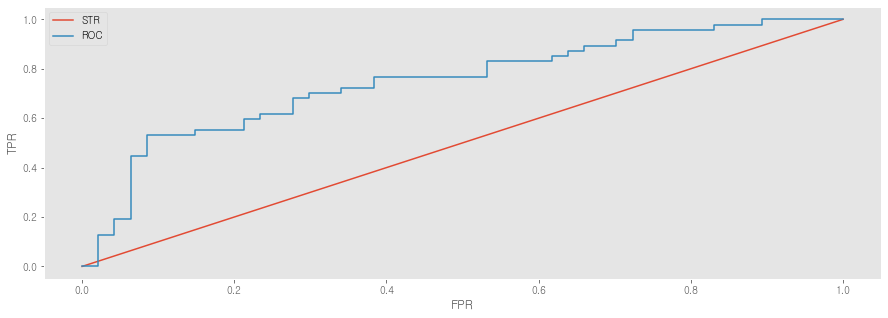

In [458]:
predicted=soft_vote.predict(x_test_stat10_ensemble)

#baseline - rf tree / roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label = soft_vote.predict_proba(x_test_stat10_ensemble)[:,1]
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [459]:
auc = roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('ensemble_10')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


### 15 변수

In [460]:
# ensemble 할 model 정의
models = [
    ('gbc', GradientBoostingClassifier(learning_rate= 0.08,n_estimators=10,random_state=42 ) ),
    ('rfc', RandomForestClassifier(n_estimators=260, max_depth= 3,random_state=42) ),
    ('svc', svm.SVC(C=0.1,probability=True,random_state=42)),
    ('lr', LogisticRegressionCV(random_state=42)),
    ('mlp',MLPClassifier(hidden_layer_sizes=(48,34,51), activation='relu', \
                    solver='adam', alpha=0.01, batch_size=32, \
                    learning_rate_init=0.1, max_iter=500,random_state=42))
]


# soft vote
soft_vote  = VotingClassifier(models, voting='soft')
#soft_vote_cv = cross_validate(soft_vote, x_train_base_ensemble, np.ravel(y_train), cv=5)
soft_vote.fit(x_train_stat15_ensemble, np.ravel(y_train))
print(soft_vote)

VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(learning_rate=0.08,
                                                         n_estimators=10,
                                                         random_state=42)),
                             ('rfc',
                              RandomForestClassifier(max_depth=3,
                                                     n_estimators=260,
                                                     random_state=42)),
                             ('svc',
                              SVC(C=0.1, probability=True, random_state=42)),
                             ('lr', LogisticRegressionCV(random_state=42)),
                             ('mlp',
                              MLPClassifier(alpha=0.01, batch_size=32,
                                            hidden_layer_sizes=(48, 34, 51),
                                            learning_rate_init=0.1,
                                            ma

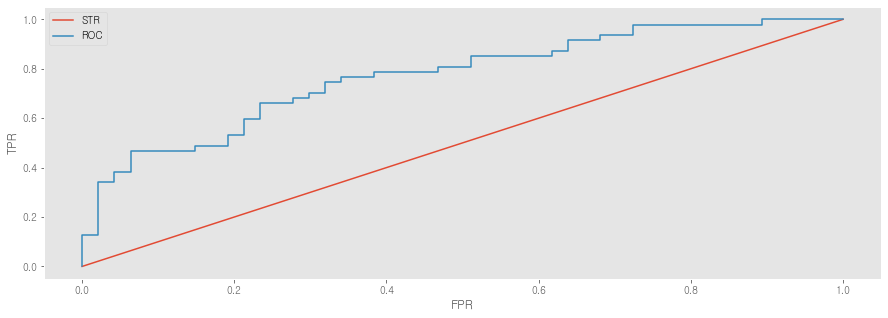

In [461]:
predicted=soft_vote.predict(x_test_stat15_ensemble)

#baseline - rf tree / roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label = soft_vote.predict_proba(x_test_stat15_ensemble)[:,1]
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [462]:
auc = roc_auc_score(y_test,pred_positive_label)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, pos_label=1)
specificity = recall_score(y_true=y_test, y_pred=predicted, pos_label=0)
f1 = f1_score(y_true=y_test, y_pred=predicted)


names.append('ensemble_15')
aucs.append(auc)
accs.append(accuracy)
recalls_list.append(recall)
specificitys.append(specificity)
f1s.append(f1)


In [463]:
test_ensemble= pd.concat([pd.DataFrame(names),
                     pd.DataFrame(aucs),
                     pd.DataFrame(accs),
                     pd.DataFrame(recalls_list),
                     pd.DataFrame(specificitys),
                     pd.DataFrame(f1s)
                    ],axis=1)
test_ensemble.columns=['name','AUC','ACC','RECALL','SPECIFICITY','F1']
test_ensemble

,name,AUC,ACC,RECALL,SPECIFICITY,F1
0,ensemble_17,0.786329,0.702128,0.638298,0.765957,0.681818
1,ensemble_10,0.749208,0.691489,0.617021,0.765957,0.666667
2,ensemble_15,0.770937,0.680851,0.595745,0.765957,0.651163


In [464]:
test_ensemble.sort_values('name')

,name,AUC,ACC,RECALL,SPECIFICITY,F1
1,ensemble_10,0.749208,0.691489,0.617021,0.765957,0.666667
2,ensemble_15,0.770937,0.680851,0.595745,0.765957,0.651163
0,ensemble_17,0.786329,0.702128,0.638298,0.765957,0.681818


# 전체 결과

In [104]:
test_logistic.sort_values('name')

,name,AUC,ACC,RECALL,SPECIFICITY,F1
1,logistic_10,0.724762,0.606383,0.702128,0.510638,0.640777
2,logistic_15,0.705297,0.638298,0.829787,0.446809,0.696429
0,logistic_17,0.689000,0.606383,0.744681,0.468085,0.654206


In [105]:
test_svm.sort_values('name')

,name,AUC,ACC,RECALL,SPECIFICITY,F1
1,svm_10,0.744681,0.744681,0.617021,0.872340,0.707317
2,svm_15,0.702128,0.702128,0.595745,0.808511,0.666667
0,svm_17,0.702128,0.702128,0.595745,0.808511,0.666667


In [106]:
test_rf.sort_values('name')

,name,AUC,ACC,RECALL,SPECIFICITY,F1
1,rf_10,0.670213,0.670213,0.553191,0.787234,0.626506
2,rf_15,0.659574,0.659574,0.595745,0.723404,0.636364
0,rf_17,0.680851,0.680851,0.617021,0.744681,0.659091


In [145]:
test_gbm.sort_values('name')

,name,AUC,ACC,RECALL,SPECIFICITY,F1
1,gbm_10,0.739022,0.702128,0.638298,0.765957,0.681818
2,gbm_15,0.753735,0.680851,0.595745,0.765957,0.651163
0,gbm_17,0.756677,0.712766,0.680851,0.744681,0.703297


In [465]:
test_mlp.sort_values('name')

,name,AUC,ACC,RECALL,SPECIFICITY,F1
1,mlp_10,0.752603,0.670213,0.617021,0.723404,0.651685
2,mlp_15,0.735401,0.712766,0.659574,0.765957,0.696629
0,mlp_17,0.746039,0.691489,0.659574,0.723404,0.681319


In [466]:
test_ensemble.sort_values('name')

,name,AUC,ACC,RECALL,SPECIFICITY,F1
1,ensemble_10,0.749208,0.691489,0.617021,0.765957,0.666667
2,ensemble_15,0.770937,0.680851,0.595745,0.765957,0.651163
0,ensemble_17,0.786329,0.702128,0.638298,0.765957,0.681818


In [ ]:
stop....

# metric

In [ ]:
def my_specificity(recall,acc):
    d = recall*47
    a = 94*acc-d
    spec = a/47
    return spec

In [ ]:
rf_recalls=[0.574,0.574,0.574,0.78,0.617,0.553,0.8,0.553,0.596,0.76,0.553,0.596]
rf_accs=[0.6595,0.691,0.691,0.52,0.745,0.702,0.638,0.713,0.702,0.6489,0.713,0.7002]
rf_specificty = []

for i,recall in enumerate(rf_recalls):
    rf_specificty.append(my_specificity(recall,rf_accs[i]))
    print(my_specificity(recall,rf_accs[i]))

In [ ]:
stat_recalls=[0.574,0.574,0.574,0.7,0.617,0.553,0.83,0.59,0.596,0.74,0.596,0.617]
stat_accs=[0.6595,0.691,0.691,0.606,0.745,0.67,0.638,0.702,0.66,0.606,0.702,0.681]
stat_specificty=[]
for i,recall in enumerate(stat_recalls):
    stat_specificty.append(my_specificity(recall,stat_accs[i]))
    print(my_specificity(recall,stat_accs[i]))

In [ ]:
rf_specificty

In [ ]:
stat_specificty

In [ ]:
common_recalls=[0.766,0.553,0.596]
common_accs=[0.627,0.713,0.702]

for i,recall in enumerate(common_recalls):
    print(my_specificity(recall,common_accs[i]))

# 머신러닝, 통계적 공통 변수

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
common_col = ['bed','Hsp-acq','3m-Ab','3m-Adm','1y-UTI','Hb','Foley','NR','sex','iDBP','pCO2','Plt','PPIantacid']
x_train_common = x_train.copy()
x_train_common = x_train_common[common_col]

In [ ]:
x_test_common = x_test.copy()
x_test_common = x_test_common[common_col]

In [ ]:
x_train_common

## random forest

In [ ]:

param_list = {"n_estimators": list(range(10, 500, 10)),
              "max_depth": [1,2,3,4,5],}

rf = RandomForestClassifier(random_state=1234,)

rf_random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions = param_list,
        n_iter = 50,
        cv = 5,
        scoring = 'accuracy',
        n_jobs=4,)

rf_random_search.fit(x_train_common, y_train['CIP'])


In [ ]:
print('best params : ' ,rf_random_search.best_params_)
model_best=rf_random_search.best_estimator_

In [ ]:
model_best = RandomForestClassifier(n_estimators=160, max_depth=1,random_state=1234)
model_best.fit(x_train_common, y_train['CIP'])

In [ ]:
from sklearn.metrics import accuracy_score

predicted = model_best.predict(x_test_common)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')


In [ ]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best.predict(x_test_common)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [ ]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



## svm

In [ ]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'linear',random_state=1234)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,param_grid = parameters, cv = 5)

grid_svm.fit(x_train_common, y_train['CIP'])

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)


In [ ]:

print('best params : ' ,grid_svm.best_params_)
model_best_svm = grid_svm.best_estimator_

In [ ]:
model_best_svm = svm.SVC(C=0.1,kernel = 'linear',random_state=1234,probability=True)
model_best_svm.fit(x_train_common, y_train['CIP'])

In [ ]:
from sklearn.metrics import accuracy_score

predicted = model_best_svm.predict(x_test_common)
accuracy = accuracy_score(y_true=y_test,y_pred=predicted)
recall = recall_score(y_true=y_test, y_pred=predicted, average=None)

print(f'accuracy score: {accuracy:.3}')
print(f'recall score: {recall[1]:.3}')

In [ ]:
# roc curve
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=model_best_svm.predict(x_test_common)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()



In [ ]:
# auc score

from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))



## logistic regression

In [ ]:
#표준화

common_numeric_cols = ['Hb','iDBP','pCO2','Plt']

scaler = StandardScaler()

x_train_common_logistic = x_train_common.copy()
x_test_common_logistic = x_test_common.copy()


x_train_common_logistic[common_numeric_cols] = scaler.fit_transform(x_train_common_logistic[common_numeric_cols])
x_test_common_logistic[common_numeric_cols] = scaler.transform(x_test_common_logistic[common_numeric_cols])




In [ ]:


logit_mod = sm.Logit(y_train['CIP'], x_train_common_logistic)
results = logit_mod.fit()

#model_logistic = LogisticRegression( )
#model_logistic.fit( x_train_base_logistic, y_train['CIP'] )
#model_logistic.predict( x_test_base_logistic )

predicted = results.predict(x_test_common_logistic)
predicted1 = predicted 
print(predicted)
predicted = (predicted>0.5).astype(int)


print('common feature accuracy : ' ,accuracy_score(y_pred = predicted, y_true = y_test['CIP']))
print('common feature recall : ' ,recall_score(y_pred = predicted, y_true = y_test['CIP'],average=None)[1] )


In [ ]:
print(results.summary())

In [ ]:
print(classification_report(y_true=y_test['CIP'],y_pred=predicted) )

In [ ]:
from sklearn.metrics import roc_curve
#레이블 1일때 예측 확률
pred_positive_label=results.predict(x_test_common_logistic)
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)
precisions,recalls,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#diagonal
plt.plot([0,1],[0,1],label='STR')

#ROC

plt.plot(fprs,tprs,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()


In [ ]:
    #baseline - rf tree / auc score
from sklearn.metrics import roc_auc_score

print('roc auc value {}'.format(roc_auc_score(y_test,pred_positive_label) ))